
---
### 📄 Informasi Dataset

Dataset ini berisi data pasien yang digunakan untuk prediksi penyakit jantung (Heart Disease). Setiap baris merepresentasikan satu pasien dengan fitur-fitur sebagai berikut:

- **age** : Umur pasien (tahun)
- **sex** : Jenis kelamin (1 = laki-laki, 0 = perempuan)
- **cp** : Tipe nyeri dada (0-3)
- **trestbps** : Tekanan darah istirahat (mm Hg)
- **chol** : Kolesterol serum (mg/dl)
- **fbs** : Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)
- **restecg** : Hasil elektrokardiografi istirahat (0-2)
- **thalach** : Denyut jantung maksimum yang dicapai
- **exang** : Angina yang diinduksi oleh olahraga (1 = ya, 0 = tidak)
- **oldpeak** : Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- **slope** : Kemiringan segmen ST puncak latihan (0-2)
- **ca** : Jumlah pembuluh darah utama (0-3) yang diwarnai oleh fluoroskopi
- **thal** : 0 = normal, 1 = cacat tetap, 2 = cacat reversibel
- **condition** : Target (1 = ada penyakit jantung, 0 = tidak)



---

### Data Understanding



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('heart_cleveland_upload.csv')

print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29



---

### Statistik Data Numerik & Kategorik



In [30]:
print(df.describe(include='all'))

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415



---

### Data Preparation



In [31]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [32]:
print("Duplikasi Data: ", df.duplicated().sum())

Duplikasi Data:  0


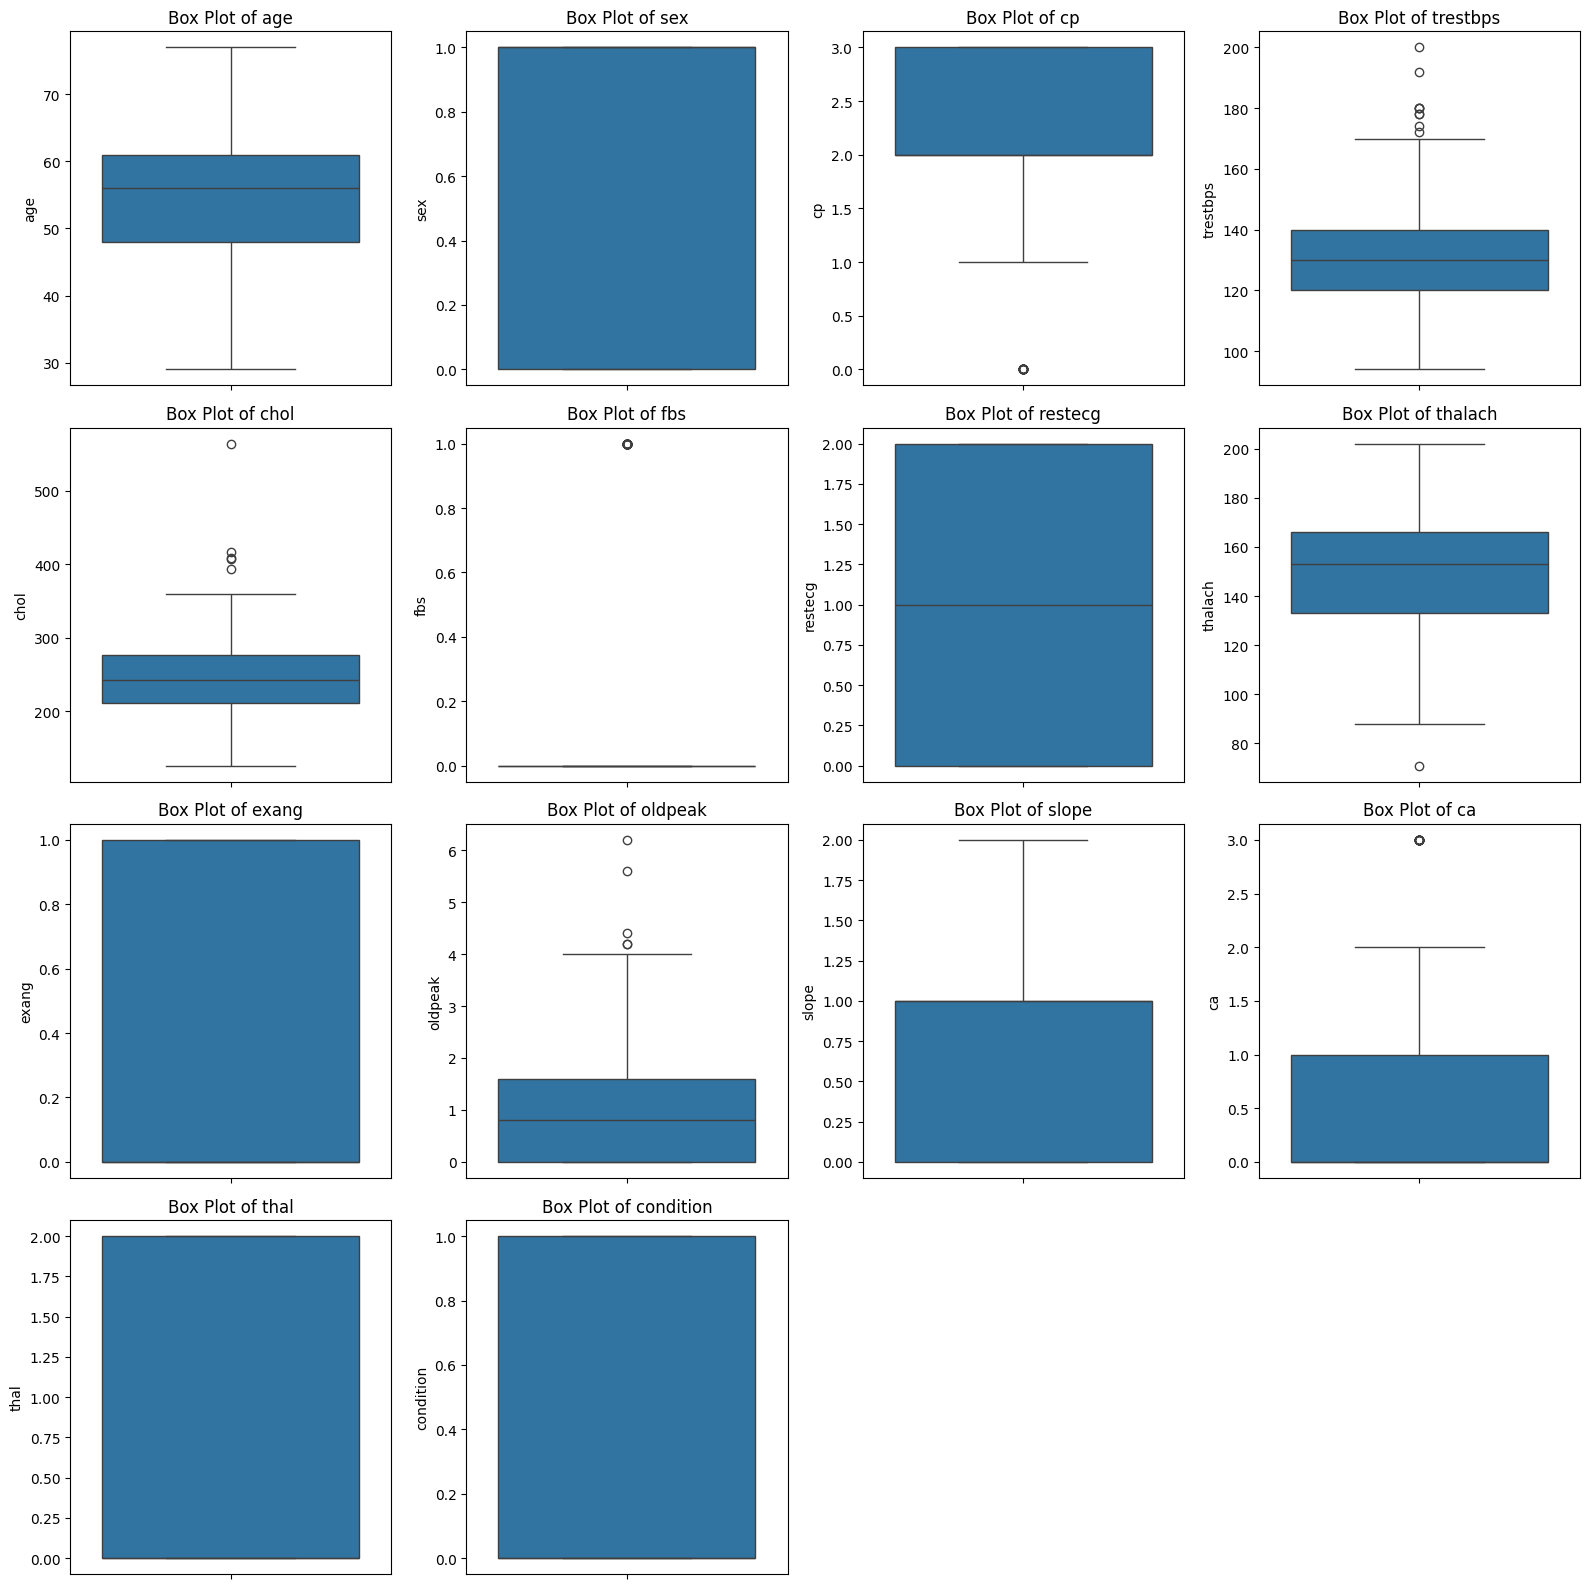

In [33]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [34]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

print(f"Number of rows before outlier removal: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")


Number of rows before outlier removal: 297
Number of rows after outlier removal: 212


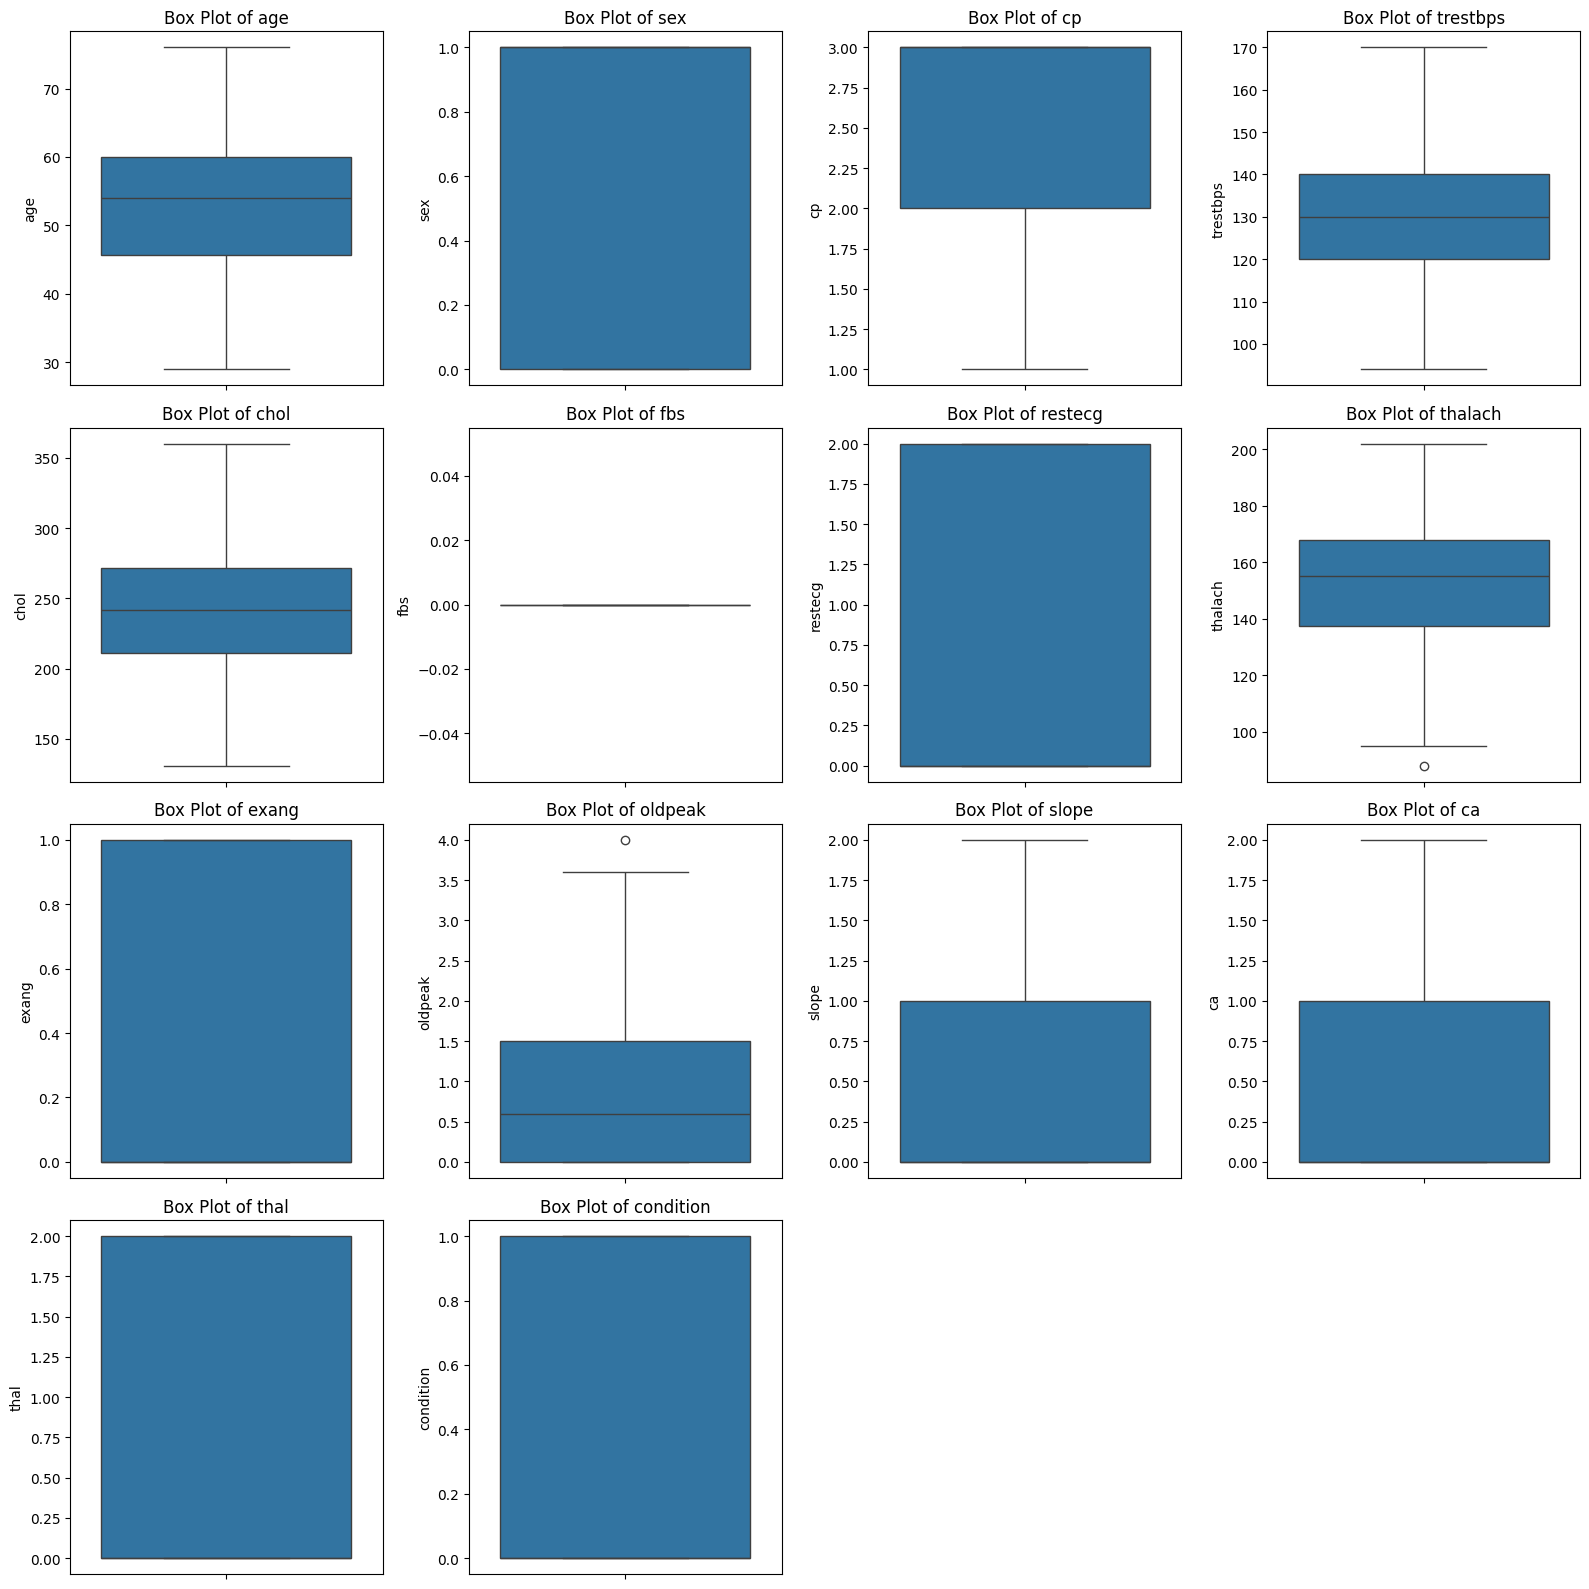

In [35]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()



---

### K-Means Clustering




Elbow Method

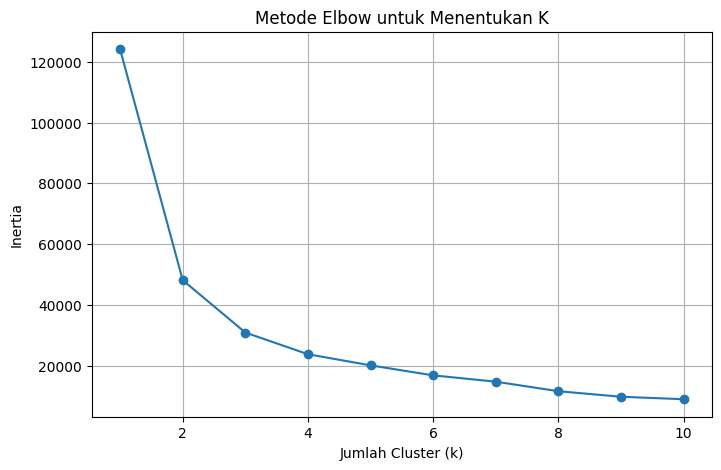

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_kmeans = df_cleaned[['age', 'thalach']]

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan K')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
df_cleaned.loc[:, 'cluster'] = kmeans.fit_predict(X_kmeans)

silhouette_avg_k2 = silhouette_score(X_kmeans, df_cleaned['cluster'])
print(f"Silhouette Score untuk k=2: {silhouette_avg_k2}")





Silhouette Score untuk k=2: 0.5117797220132166


C:\Users\muham\AppData\Local\Temp\ipykernel_12868\1231754306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'cluster'] = kmeans.fit_predict(X_kmeans)


Scatter Plot Clustering

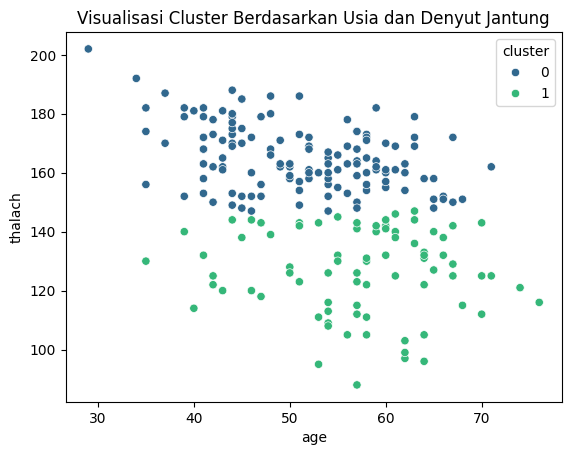

cluster  condition
0        0            97
         1            35
1        1            56
         0            24
Name: count, dtype: int64


In [38]:
import seaborn as sns

sns.scatterplot(data=df_cleaned, x='age', y='thalach', hue='cluster', palette='viridis')
plt.title('Visualisasi Cluster Berdasarkan Usia dan Denyut Jantung')
plt.show()

print(df_cleaned.groupby('cluster')['condition'].value_counts())

Model Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters' : range(3, 8),
            'init' : ['k-means++', 'random'],
            'n_init' : [10, 20, 30],
            'max_iter' : [100, 200, 300, 400, 500]
            }

In [40]:
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid)
grid_search.fit(df)


GridSearchCV(estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': range(3, 8), 'n_init': [10, 20, 30]})

In [41]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df_cleaned)
    score = silhouette_score(df_cleaned, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10}
Best Score: 0.2995012994789777




---

### Logistic Regression




Korelasi antar fitur

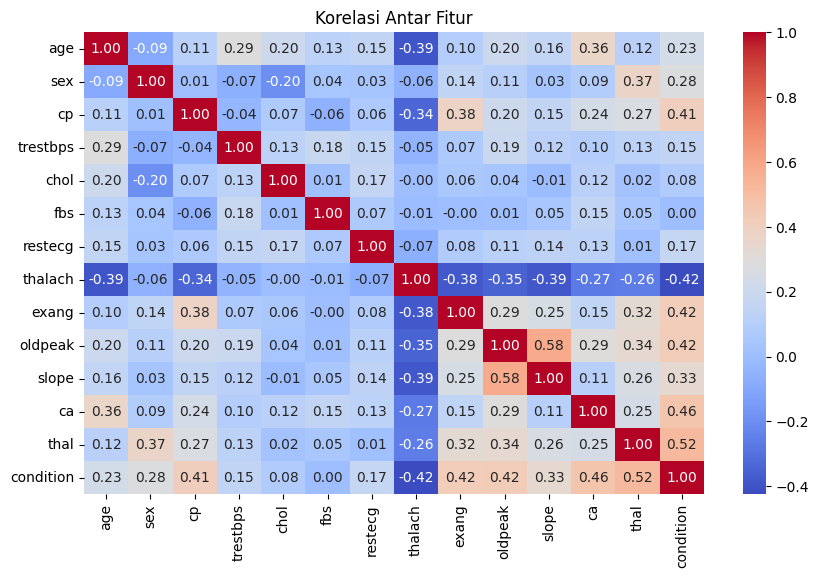

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


PreProcessing


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x = df_cleaned.drop(columns=['condition', 'cluster'], axis=1)  
y = df_cleaned['condition']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


SMOTE

In [44]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression(max_iter=1000)

Cross Validation & Threshold

In [45]:
cv_scores = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5)
print(f"Skor cross-validation: {cv_scores}")
print(f"Rata-rata skor cross-validation: {cv_scores.mean()}")

logreg.fit(X_train_resampled, y_train_resampled)

y_proba_test = logreg.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_proba_test >= 0.6).astype(int)

Skor cross-validation: [0.8        0.825      0.775      0.74358974 0.71794872]
Rata-rata skor cross-validation: 0.7723076923076924


Evaluation

In [46]:
print("Akurasi:", accuracy_score(y_test, y_pred_threshold))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("Classification Report:\n", classification_report(y_test, y_pred_threshold))

Akurasi: 0.8372093023255814
Confusion_matrix:
 [[19  3]
 [ 4 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.85      0.81      0.83        21

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.84      0.84      0.84        43



ROC AUC

In [47]:
from sklearn.metrics import roc_curve, auc
y_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr,tpr)

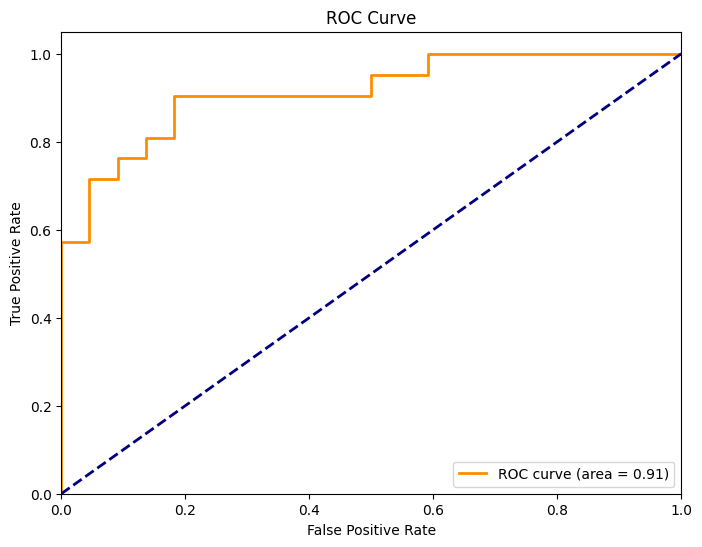

In [48]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



---

### Saving Model



In [49]:
import joblib
joblib.dump(logreg, 'model_logres.joblib')
joblib.dump(kmeans, 'model_kmeans.joblib')

['model_kmeans.joblib']

In [50]:
!ngrok config add-authtoken 2wtYfVA89fzCG3XMbeYPKBTsBSm_6TcfYZs9XH54jGJNFraTq

Authtoken saved to configuration file: C:\Users\muham\AppData\Local/ngrok/ngrok.yml




---

### 13. Deployment (Streamlit)

**Contoh kode Streamlit untuk prediksi heart disease:**



In [56]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = joblib.load("model_logres.joblib")
kmeans_model = joblib.load("model_kmeans.joblib")
df = pd.read_csv("heart_cleveland_upload.csv")

X_kmeans = df[['age', 'thalach']]
df['cluster'] = kmeans_model.predict(X_kmeans)

x = df.drop(columns=['condition', 'cluster'])
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lr_model.fit(X_train_resampled, y_train_resampled)

y_pred = lr_model.predict(X_test)

y_proba_test = lr_model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_proba_test >= 0.6).astype(int)

st.title("🫀 Dashboard Analisis Penyakit Jantung")

tab1, tab2, tab3 = st.tabs(["📊 Dataset", "📍 Clustering", "🧪 Prediksi"])

with tab1:
    st.subheader("Informasi Dataset")
    st.write(df.head())
    st.write("Jumlah Data:", df.shape[0])
    st.write("Jumlah Fitur:", df.shape[1])
    condition_labels = df['condition'].replace({0: '✅ Sehat', 1: '⚠️ Berisiko'})
    st.bar_chart(condition_labels.value_counts())


with tab2:
    st.subheader("Visualisasi Clustering Berdasarkan Usia dan Denyut Jantung")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='thalach', hue='cluster', palette='viridis', ax=ax)
    plt.title("Clustering Berdasarkan Umur dan Thalach")
    st.pyplot(fig)

    st.write("Pembagian Pasien Berdasarkan Thalach per Cluster")

    cluster_0_min = df[df['cluster'] == 0]['thalach'].min()
    cluster_0_max = df[df['cluster'] == 0]['thalach'].max()

    cluster_1_min = df[df['cluster'] == 1]['thalach'].min()
    cluster_1_max = df[df['cluster'] == 1]['thalach'].max()

    st.write(f"Cluster 0: Rentang thalach {cluster_0_min} hingga {cluster_0_max}")
    st.write(f"Cluster 1: Rentang thalach {cluster_1_min} hingga {cluster_1_max}")

    cluster_0 = len(df[df['cluster'] == 0])
    cluster_1 = len(df[df['cluster'] == 1])

    cluster_summary = pd.DataFrame({
        "Denyut Jantung": ["147 - 202", "71 - 147"],
        "Jumlah Pasien": [cluster_0, cluster_1]
    })
    
    st.dataframe(cluster_summary)

with tab3:
    st.subheader("Prediksi Penyakit Jantung (Logistic Regression)")

    age = st.slider("Usia", 29, 77, 50)
    sex = st.selectbox("Jenis Kelamin", options=["Perempuan", "Laki-laki"])
    sex = 0 if sex == "Perempuan" else 1

    cp_dict = {
        "Typical Angina (biasanya bagian dada kiri atau tengah)": 0,
        "Atypical Angina (nyeri dada yang tidak biasa)": 1,
        "Non-anginal Pain (bukan disebabkan masalah jantung)": 2,
        "Asymptomatic (tanpa gejala)": 3
    }
    cp_label = st.selectbox("Tipe Nyeri Dada", list(cp_dict.keys()))
    cp = cp_dict[cp_label]

    trestbps = st.slider("Tekanan Darah Istirahat (mm Hg)", 94, 200, 120)
    chol = st.slider("Kolesterol (mg/dl)", 126, 564, 240)

    fbs = st.selectbox("Gula Darah Puasa > 120 mg/dl?", options=["Tidak", "Ya"])
    fbs = 1 if fbs == "Ya" else 0

    restecg_dict = {
        "Normal": 0,
        "Kelainan gelombang ST-T": 1,
        "Hipertrofi Ventrikel Kiri": 2
    }
    restecg_label = st.selectbox("Hasil ECG Saat Istirahat", list(restecg_dict.keys()))
    restecg = restecg_dict[restecg_label]

    thalach = st.slider("Detak Jantung Maksimal (thalach)", 71, 202, 150)

    exang = st.selectbox("Mengalami Angina Saat Latihan?", options=["Tidak", "Ya"])
    exang = 1 if exang == "Ya" else 0

    oldpeak = st.slider("Depresi ST (oldpeak)", 0.0, 6.2, 1.0)

    slope_dict = {
        "Meningkat": 0,
        "Datar": 1,
        "Menurun": 2
    }
    slope_label = st.selectbox("Kemiringan ST", list(slope_dict.keys()))
    slope = slope_dict[slope_label]

    ca = st.selectbox("Jumlah Pembuluh Darah Besar yang Terlihat (0-3)", options=["0", "1", "2", "3"])
    ca = int(ca)

    thal_dict = {
        "Normal": 0,
        "Cacat Tetap": 1,
        "Cacat Reversibel": 2
    }
    thal_label = st.selectbox("Hasil Tes Thalium", list(thal_dict.keys()))
    thal = thal_dict[thal_label]

    
    input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg,
                                thalach, exang, oldpeak, slope, ca, thal]],
                                columns=['age', 'sex', 'cp', 'trestbps', 'chol',
                                        'fbs', 'restecg', 'thalach', 'exang',
                                        'oldpeak', 'slope', 'ca', 'thal'])

    if st.button("Prediksi"):
        proba = lr_model.predict_proba(input_data)[0][1]
        prediction = (proba >= 0.6).astype(int)
        st.write(f"**Hasil Prediksi:** {'⚠️ Berisiko' if prediction else '✅ Sehat'}")
        st.write(f"**Probabilitas:** {proba:.2f}")

    st.subheader("Confusion Matrix")
    
    y_pred = lr_model.predict(X_test)
    y_proba_test = lr_model.predict_proba(X_test)[:, 1]
    y_pred_threshold = (y_proba_test >= 0.6).astype(int)

    cm = confusion_matrix(y_test, y_pred_threshold)
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sehat', 'Berisiko'], yticklabels=['Sehat', 'Berisiko'])
    ax_cm.set_xlabel('Prediksi')
    ax_cm.set_ylabel('Aktual')
    ax_cm.set_title('Confusion Matrix')
    st.pyplot(fig_cm)
    
    st.subheader("ROC Curve (Training Data)")

    y_proba = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    fig_roc, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")
    ax.legend()
    st.pyplot(fig_roc)



Overwriting app.py


In [52]:
from pyngrok import ngrok
import threading
import time
import os

In [53]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://d5ed-2404-8000-1024-4a58-5c7a-5a73-afc1-eb19.ngrok-free.app" -> "http://localhost:8501"
